# TUGAS 02 - Natural Language Processing
## I. Pengantar
### Latar Belakang
Dalam melakukan Analisa sentimen yang berguna untuk mengambil informasi dari suatu teks seperti komentar di Tokopedia/Facebook/Zomato/Twitter tentunya tidak mudah melakukan aksesnya dan harus membuat web crawler yang juga tidak mudah dibuat. Twitter menyediakan sebuah API yang memungkinkan kita untuk mengakses tweet dengan kata kunci tertentu, sehingga nantinya ini bisa digunakan untuk analisa sentimen. 

Di masa pandemi ini banyak terjadi topik-topik menarik. Data scientist diminta untuk melakukan analisa sentimen masyarakat terkait topik-topik yang sedang panas pada saat-saat ini terkait COVID.

### Tujuan
- Melakukan analisa sentimen dari tweet di twitter yang terkait topik COVID-19:
  
  - Dapat melakukan analisa sentimen dari tweet yang bahasanya berbeda.
  - Mengklasifikasikan tweet yang memiliki sentimen positif, negatif, dan netral.
  - Membuat wordcloud yang menampilkan kata yang paling sering muncul untuk setiap kasus sentimen(positif, negatif, netral).
  - Menentukan kata yang menjadikan suatu tweet memiliki nilai sentimen positif/negatif/netral.

In [5]:
import nbmerge
nbmerge "Proyek UAS (5).ipynb" "Proyek UAS (5)" > merged.ipynb

SyntaxError: invalid syntax (<ipython-input-5-46f438c54ca7>, line 2)

## II. Langkah Pengerjaan

In [65]:
# Mengambil semua library yang dibutuhkan untuk pengerjaan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import string
import tweepy
import nltk
import sys
import os
import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from langdetect import detect
from textblob import TextBlob
from PIL import Image

In [70]:
# Autentikasi untuk menggunakan twitter API
consumerKey = '398CFhjDeUtvqr5hTst0Mj6Zb'
consumerSecret ='xwBhnGYvyLkWjL3vIShGTSa1dPbWxk28dUxswDiaL6q88v6pJu'
accessToken = '1393937049917399040-onzgrEzq28abboUAGJ49Pq80yCgRlz'
accessTokenSecret = 'Y0vNc4FKtONCgGOQCbYjvKYz9f3kSWVtLBqVFTWh5rVxj'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [71]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [72]:
# Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Input berupa kata kunci dan jumlah tweet yang ingin di analisis
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))

# Untuk bisa mencari data lebih dari 100 dan dari kisaran/jangka waktu tertentu (opsional)
date_since = input('please enter since date(ex:"YYYY-MM-DD"): ') #optional

tweets = tweepy.Cursor(api.search, 
                       q=keyword,
                       since=date_since).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

# Mengambil tweet dari twitter dan melakukan analisis sentimen
for tweet in tweets:
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    
    # Mentranslasi bahasa Indonesia ke Inggris (Aktifkan jika mencari dengan bahasa Indonesia)
    # an = analysis.translate(from_lang='id', to='en') 
    
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search:  covid 19 vaccine
Please enter how many tweets to analyze:  200
please enter since date(ex:"YYYY-MM-DD"):  2020-06-01


In [73]:
# Jumlah Pembagian tweet berdasarkan analisa sentimen yang dilakukan

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  200
positive number:  79
negative number:  43
neutral number:  78


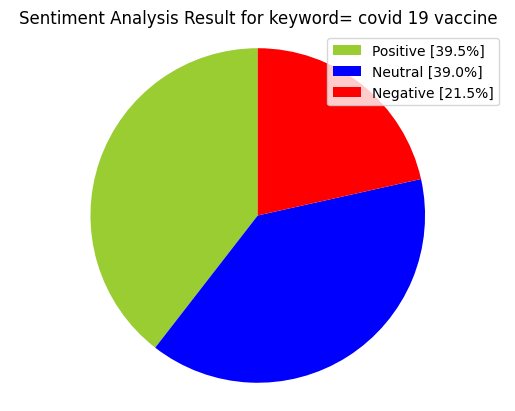

In [74]:
# Memvisualisasikan hasil dari analisa sentimen

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'' )
plt.axis('equal')
plt.show()

In [75]:
tweet_list

,0
0,RT @RMCarpiano: Celebrities advocating for the...
1,Receiving a COVID-19 vaccine is not worth the ...
2,RT @StateDept: The United States is sharing it...
3,RT @SamuelHHoward: From the @NewsGuardRating C...
4,"Join Premier Brian Pallister and Manny Atwal, ..."
...,...
195,RT @jm_mcgrath: Ontario administered 177506 do...
196,RT @regionofpeel: Heading to your COVID-19 vac...
197,RT @RandPaul: This information frees up millio...
198,"To increase vaccination rates, Washington is o..."


In [76]:
# Menghapus data yang duplikat

tweet_list.drop_duplicates(inplace = True)

In [77]:
# Membersihkan Text/Tweet

# Membuat dataframe and fitur baru
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]

# Menghapus RT, Pungtuasi, dll
remove_rt = lambda x: re.sub('RT @\w+: ','',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()

tw_list.head(10)

,0,text
0,RT @RMCarpiano: Celebrities advocating for the...,celebrities advocating for the covid19 vaccin...
1,Receiving a COVID-19 vaccine is not worth the ...,receiving a covid 19 vaccine is not worth the ...
2,RT @StateDept: The United States is sharing it...,the united states is sharing its covid 19 u s ...
3,RT @SamuelHHoward: From the @NewsGuardRating C...,from the covid 19 myths page none of the c...
4,"Join Premier Brian Pallister and Manny Atwal, ...",join premier brian pallister and manny atwal ...
5,"RT @Complex: Update: 178 hospital employees, w...",update 178 hospital employees who sued their...
6,RT @MakeItPlain: Nearly 200 staff members at #...,nearly 200 staff members at houstonmethodisth...
7,"The Hyderabad Woman Behind Corbevax, India’s U...",the hyderabad woman behind corbevax india s u...
8,"RT @nikki_miumiu: Great news, the CEPI investe...",great news the cepi invested 620 000 into th...
9,RT @MaryanneDemasi: Researchers petition the ⁦...,researchers petition the fda to refrain fr...


In [79]:
# Membuat dataframe untuk tiap jenis sentimen dari tweet (positif, negatif, dan netral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [80]:
# Membuat fungsi untuk membuat dan memvisualisasikan wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    mask = mask,
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


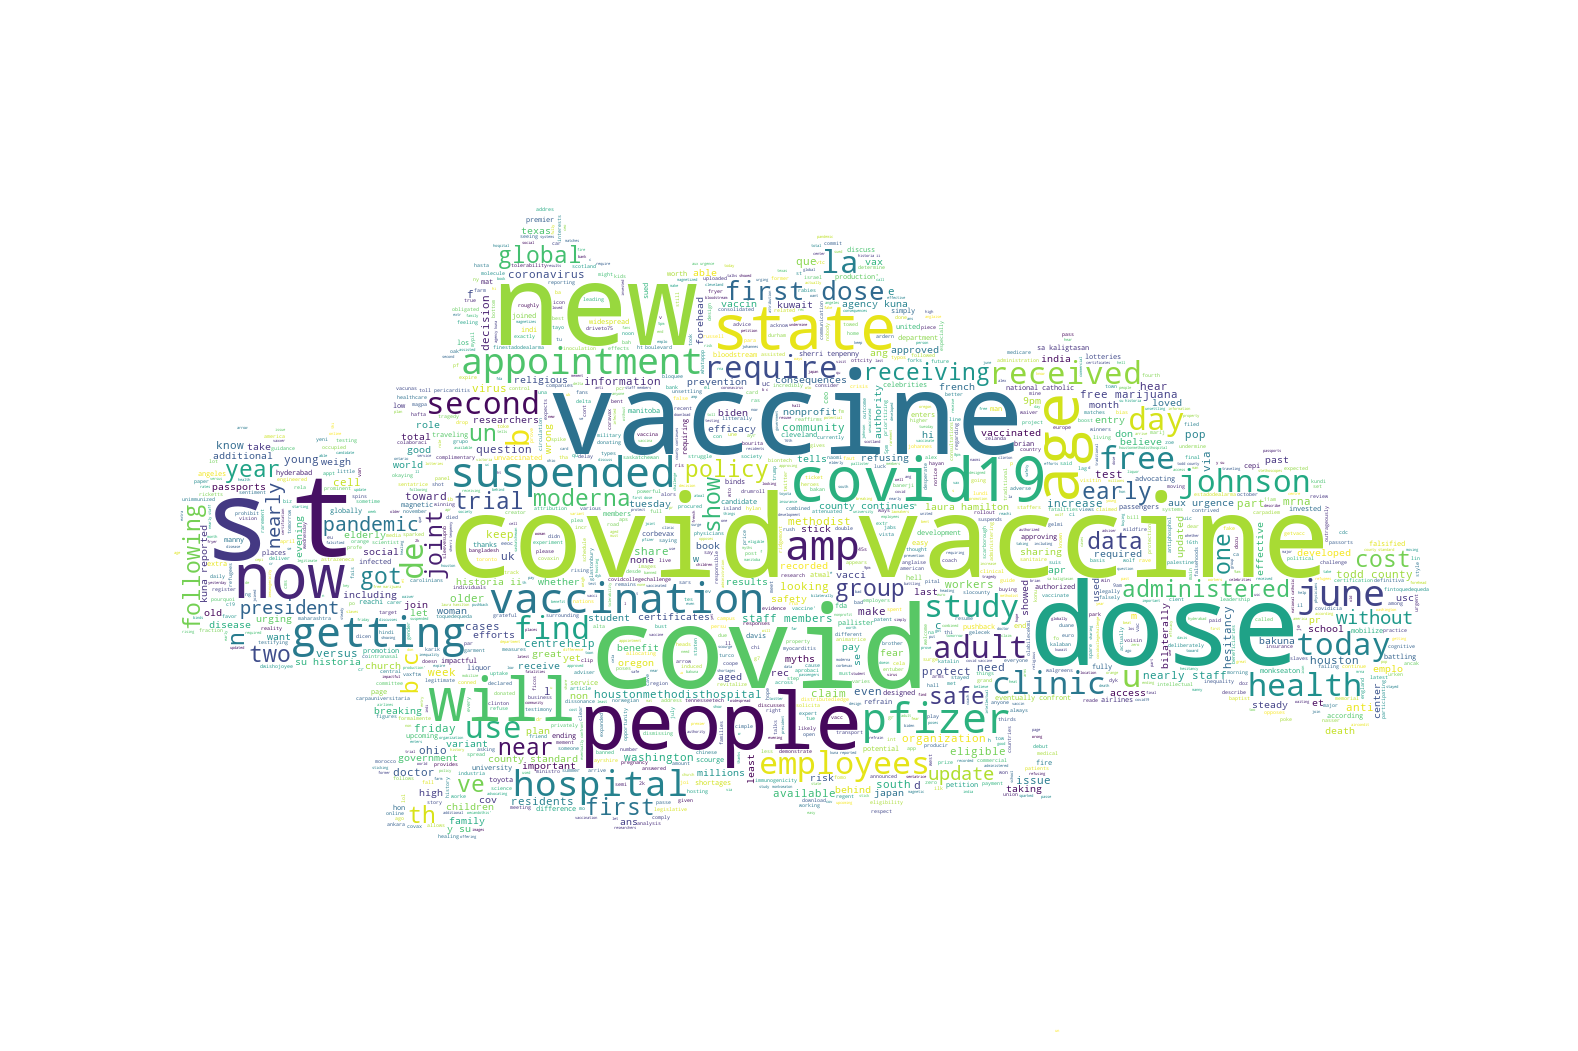

In [81]:
# Membuat wordcloud untuk setiap sentimen dataframe

create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


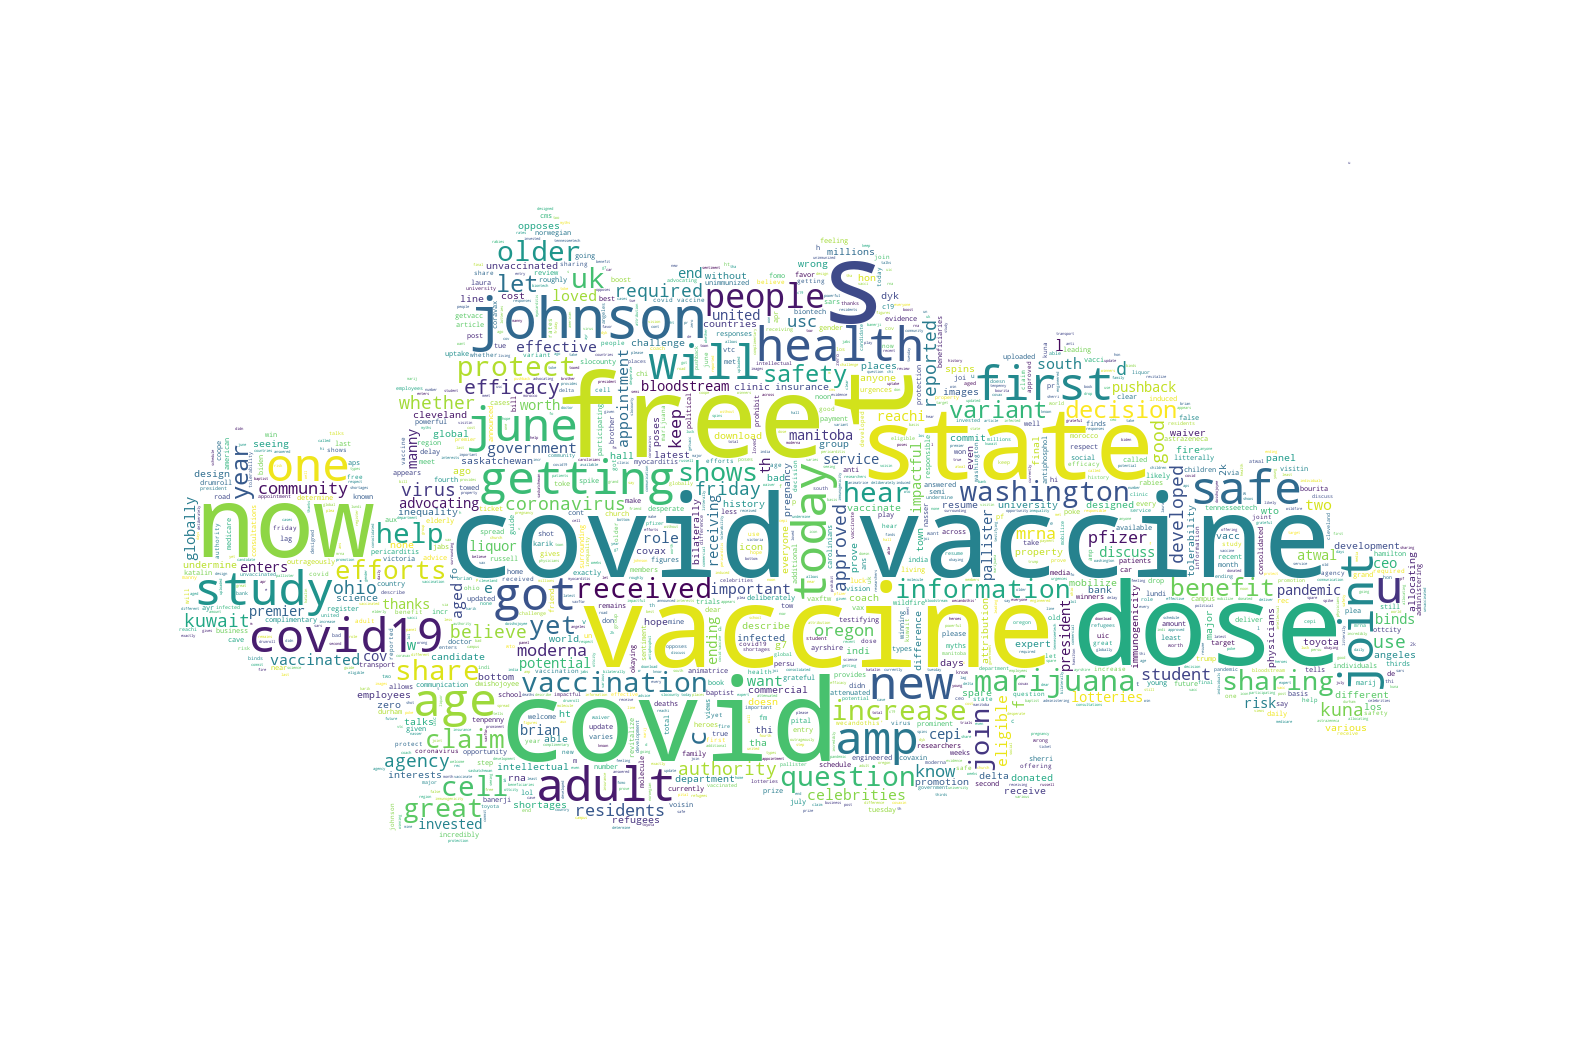

In [82]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


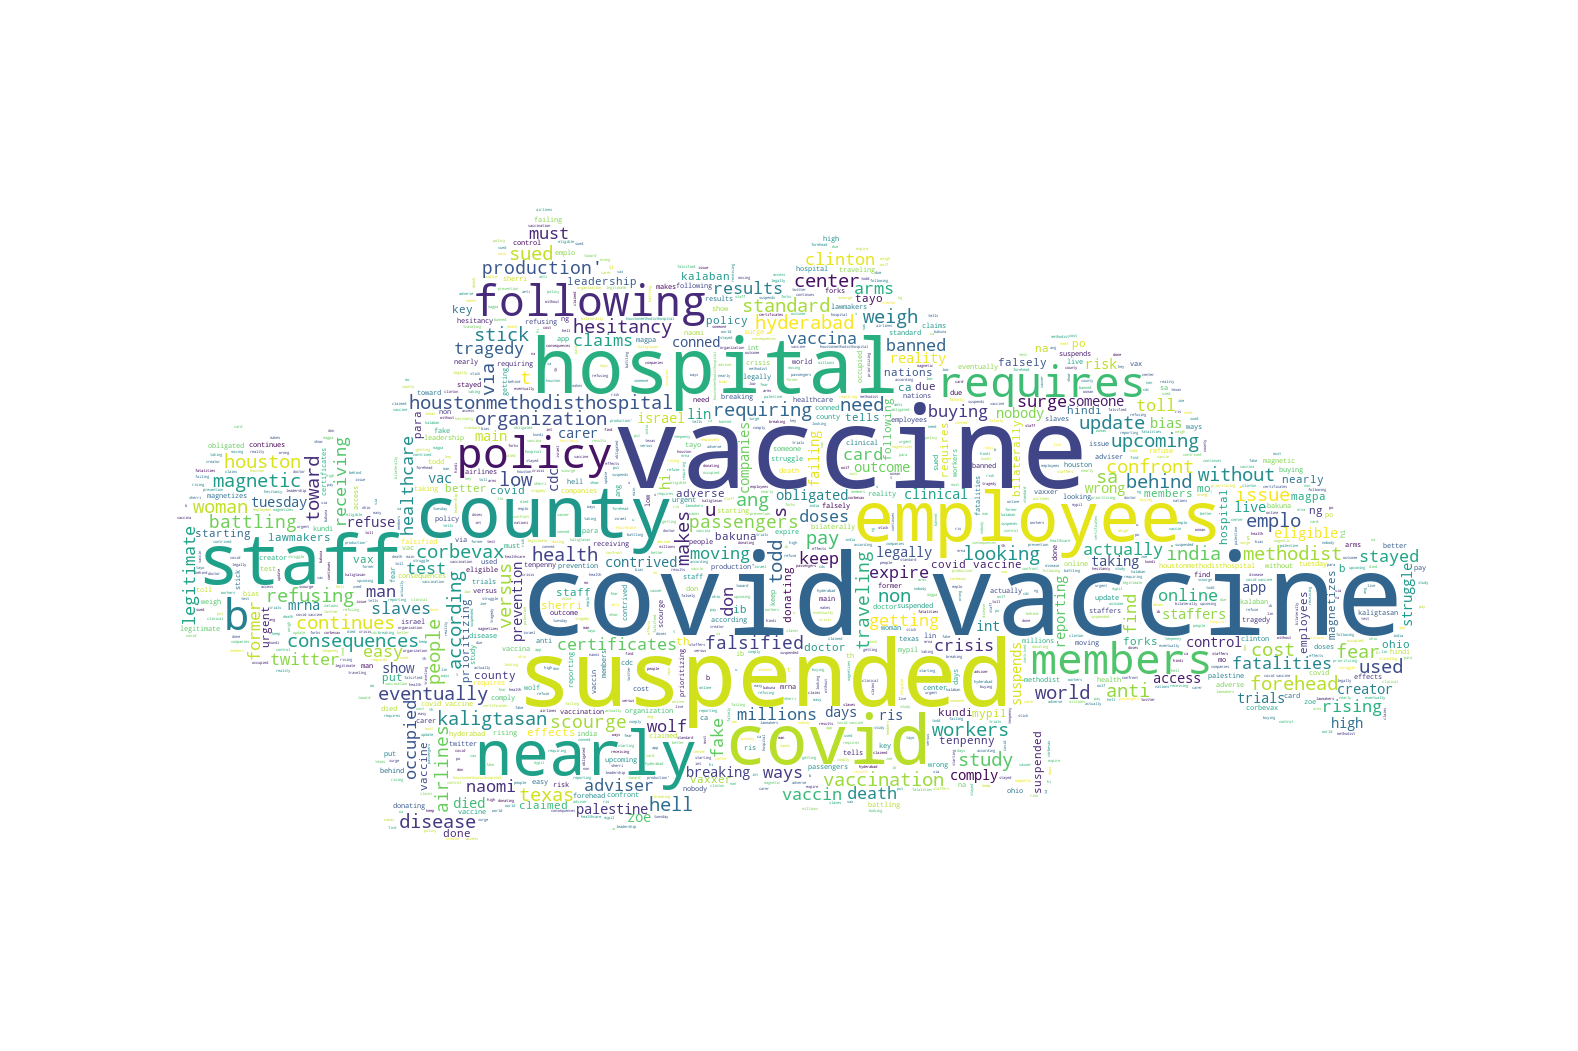

In [83]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


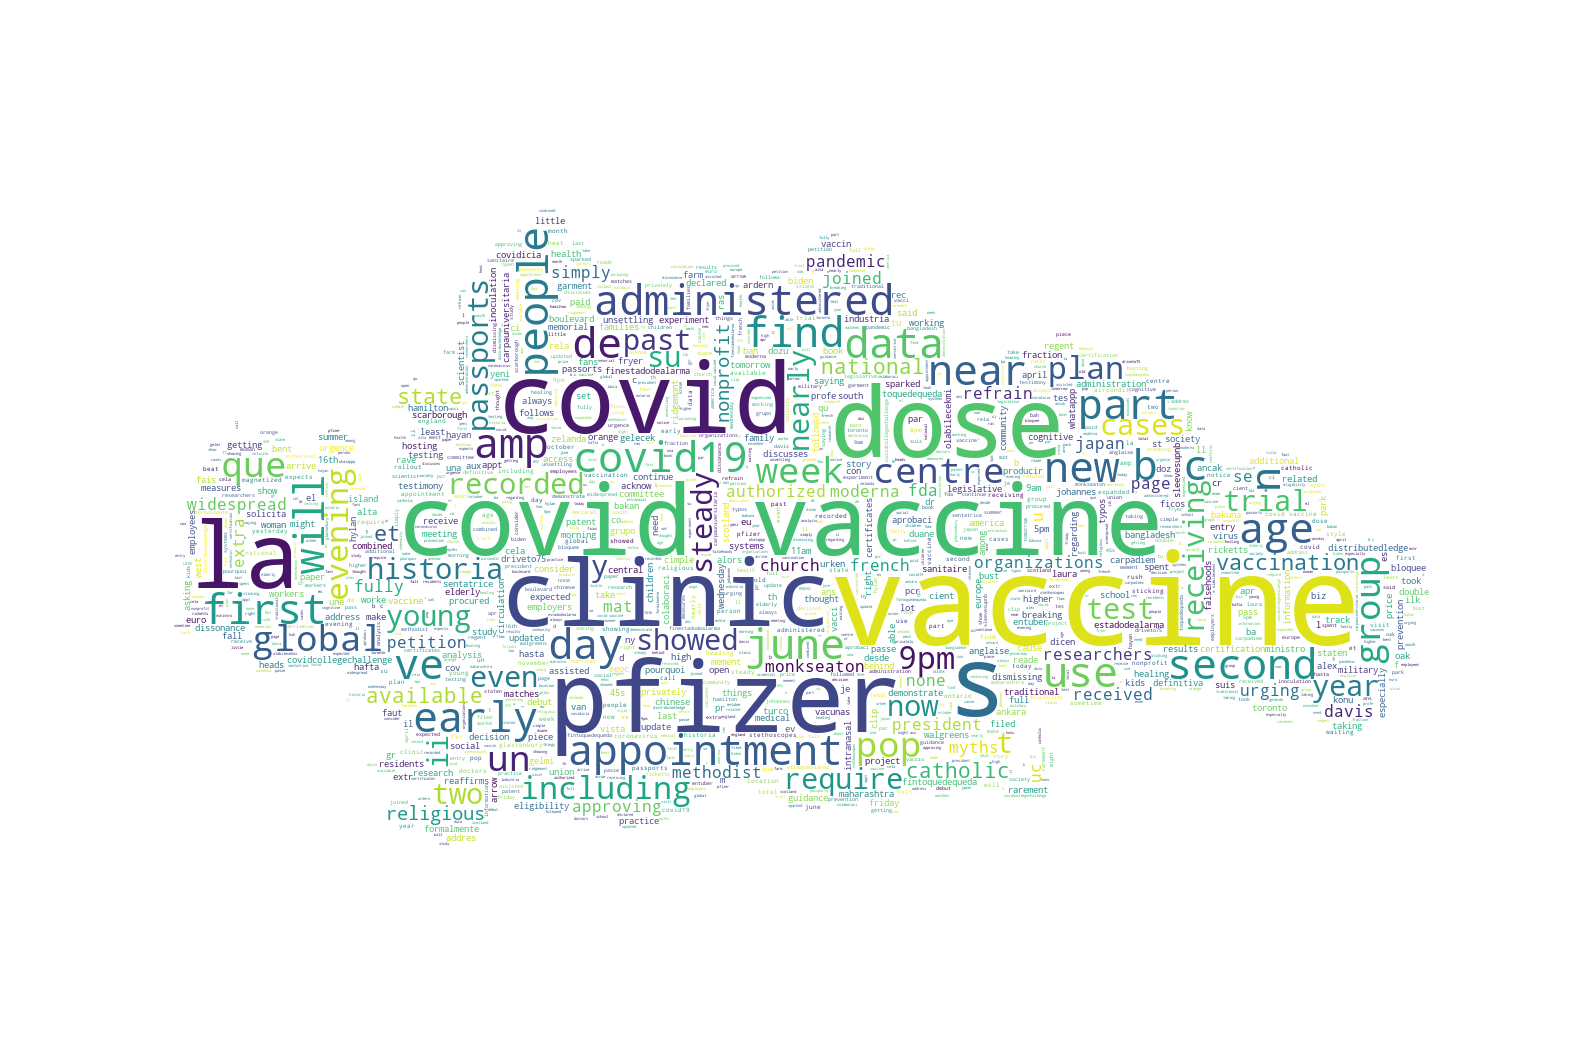

In [84]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

## III. Laporan & Analisis

In [88]:
# Mencari kata kunci yang mewakili sentimen suatu tweet positif/negatif/netral

# Sentimen Positif
words_positive = tw_list_positive["text"][172]
words_positive

'the covid 19 vaccine is safe and effective  it gives you the best protection against coronavirus   don t delay in getting your v '

In [89]:
SentimentIntensityAnalyzer().polarity_scores(words_positive)

{'neg': 0.078, 'neu': 0.576, 'pos': 0.346, 'compound': 0.836}

In [109]:
SentimentIntensityAnalyzer().polarity_scores('best')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6369}

In [112]:
# Sentimen Negatif
words_negative = tw_list_negative["text"][156]
words_negative

'178 hospital workers in texas suspended for refusing to get covid 19 vaccine    '

In [113]:
SentimentIntensityAnalyzer().polarity_scores(words_negative)

{'neg': 0.345, 'neu': 0.655, 'pos': 0.0, 'compound': -0.7003}

In [120]:
SentimentIntensityAnalyzer().polarity_scores('suspended')

{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767}

In [126]:
# Sentimen Netral
words_neutral = tw_list_neutral["text"][195]
words_neutral

'ontario administered 177506 doses of covid 19 vaccine by 8pm yesterday  for a total of 10445119 administered so far  18   1 '

In [127]:
SentimentIntensityAnalyzer().polarity_scores(words_neutral)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [128]:
# Karena nilai 'neu' pada tweetnya 
SentimentIntensityAnalyzer().polarity_scores('vaccine')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

### Analisa mencari kata kunci yang menentukan sentimen dari tweet
Setelah melakukan analisis sentimen, biasanya akan dilakukan pencarian kata kunci yang paling mempengaruhi sentimen dari text/tweet yang dibuat. Dari wordcloud yang sudah dibuat kita bisa melihat perbandingan seberapa sering suatu kata muncul/ berada pada tweet yang bersentimen baik positif, negatif, dan netral. Tetapi, kata yang besar/sering muncul itu tidak menjamin akan menjadi penentu sentimen dari tweet tersebut.

Oleh karena itu, cara yang dilakukan adalah dengan menganalisis tweet yang diambil dan melihat nilainya apakah niilainya positif, negatif, atau netral. Selain itu, yang penting untuk diperhatikan adalah nilai compound yang menunjukkan seberapa besar suatu kata memberi pengaruh sentimen pada tweet, jika nilai compund adalah 0 maka bisa dipastikan kata tersebut netral, sedangkan untuk menentukan positif atau negatif adalah jika nilai compound > 0 maka kata tersebut positif dan jika nilai compound < 0 maka kata tersebut negatif. Semakin besar nilai compound maka semakin besar pengaruhnya membuat suatu tweet bersentimen positif, dan sebaliknya jika nilai compound semakin kecil maka semakin besar pengaruhnya membuat suatu tweet bersentimen negatif.

Kami mencoba melakukan pencarian kata kunci untuk mewakili sentimen positif, negatif, dan netral. Jadi kami memilih satu tweet secara acak dari tiap dataframe yang berisi tweet bersentimen positif, negatif, dan netral.Kemudian kami lakukan analisis sentimen dan mendapatkan hasil bahwa kata kunci yang menjadikan tweet tersebut memiliki nilai sentimen positif/negatif/netral adalah:  

- Positif : 'best' (compound: 0.6369)
- Negatif : 'suspended' (compound: -0.4767)
- Netral : 'vaccine' (compound: 0)

### Kendala yang dihadapi ketika pengerjaan:
- Kesulitan dalam mencari gambar cloud.png yang sesuai.
- Membuat/memasukkan keyword/tag yang tepat untuk pencarian tweet.
- Kesulitan dalam melakukan pengelompokan dan memfilter kata-kata dari text.

# TUGAS 03 - Reinforcement Learning

Mengkaji potensi reinforcement learning di masa pandemi

Salah satu hal yang sangat penting dalam menghadapi pandemi COVID-19 adalah pengambilan keputuasan (decision making). Reinforcement learning berpotensi besar untuk digunakan dalam menjalankan peran tersebut. Pengambilan keputusan yang tepat tidak hanya dibutuhkan dalam hal medis, tetapi juga dalam hal mengatur bisnis hingga mengatur interaksi masyarakat. Contoh pengambilan keputusan ini adalah kapan waktu yang tepat untuk mengizinkan karyawan kembali ke kantor, apakah perlu dilakukan lockdown, atau siapa yang menjadi prioritas penerima vaksin.

Dengan model reinforcement learning, kita dapat mencari keputusan/strategi yang paling optimal. Model akan dilatih dalam lingkungan virtual yang dapat mensimulasikan kondisi pandemi sehingga setiap efek dari keputusan yang diambil dapat terlihat. Selanjutnya, setiap keputusan yang diambil oleh model akan diberikan reward. Reward ini dapat disesuaikan dengan kebutuhan, misalnya dengan memberikan reward saat laju penyebaran covid berkurang atau ketika kondisi ekonomi membaik.

COVID-19 bisa dikatakan merupakan virus yang masih baru, sehingga data yang ada mengenai COVID belum banyak. Fakta ini menjadikan model reinforcement learning sangat tepat untuk digunakan karena tidak seperti model supervised learning yang membutuhkan banyak data. Namun, metode ini juga tidak lepas dari kekurangan. Lingkungan virtual yang bisa menggambarkan kondisi pandemi yang sesuai dengan realita sangat sulit untuk dibuat. Selain itu, pelatihan model reinforcement learning memakan waktu yang cukup lama, padahal keputusan tersebut seharusnya dibutuhkan dalam waktu sesegera mungkin.

Kesimpulannya, dengan model reinforcement learning, kita dapat menemukan strategi optimal dalam mengahadapi pandemi covid di negara atua wilayah tertentu dengan cara memaksimalkan total reward yang dapat disesuaikan dengan kebutuhan.